# Libraries and Data

In [58]:
# Computations and displaying libraries
import numpy as np
import matplotlib.pyplot as plt

# Importing a data set from sklearn with gray-scale faces images
from sklearn.datasets import fetch_olivetti_faces

In [8]:
# Download the faces dataset
image_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\edwar\scikit_learn_data


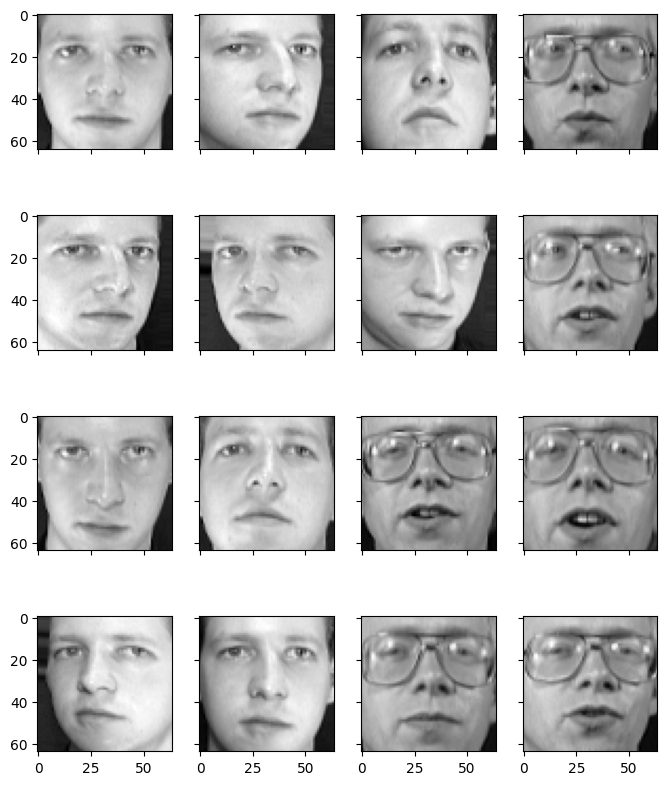

In [70]:
# Show the first 16 elements of our dataset
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(image_data.images[i].reshape(faceshape), cmap="gray")
plt.show()

# Eigen Faces Creation (PCA)

We need to do a principal analysis component (PCA) to our date set to create the eigen faces.

In [ ]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

The PCA method from sklearn need the datain the form (n_samples, n_features). Following this idea we need to see how much samples and features our data set have.

In [72]:
image_data.images.shape
# Here we see we have 400 image samples, each one is a 64x64 images.

(400, 64, 64)

We need to reshape out data set, for this we can reshape it in a (400, 64x64) = (400, 4096) array.

In [76]:
X = np.reshape(a = image_data.images, newshape=(400,-1))
X.shape

(400, 4096)

In order to produce reproducible results along the notebook we need to fix a random state to our PCA.

In [80]:
# Setting the PCA with random_state = 50
pca = PCA(random_state = 50)

In [81]:
# Fit out PCA with the reshaped images data
pca.fit(X)

PCA(random_state=50)

# PCA Analysis

After we fit our PCA model, we can see how the obtained component contribuite to explain our images. For this we can see the cumulate variance along our components.

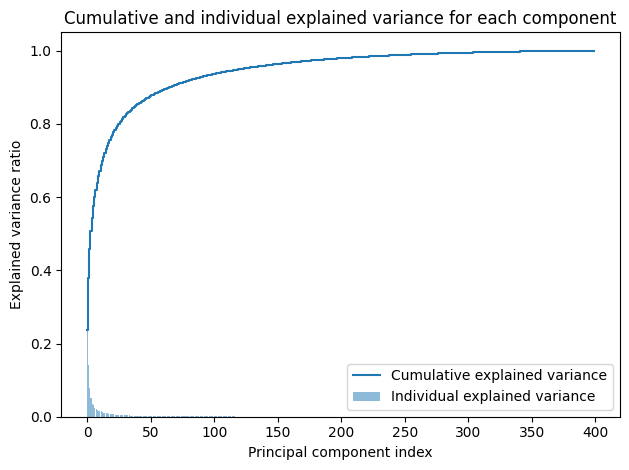

In [84]:
# Extract the variance for each component
exp_var_pca = pca.explained_variance_ratio_

# Compute the cumulative sum of variance; This will be used to create step plot
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Visualize the computations
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Cumulative and individual explained variance for each component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The previous graph can help us observe the behavior of our principal components. Around 400 components were created; the first 50 already contribute more than 80% of the variance in our dataset. If we want to establish a good set of eigenfaces, we should be interested in selecting the first n components that cumulatively account for at least 95% of the dataset variance. The following cells assist us in conducting this analysis:

In [83]:
# How many of the first components do we need to accumulate at least 95% of the variance in our dataset?
np.where(cum_sum_eigenvalues>0.95)[0][0]
# At least the first 122 components

122

So, if we must want to create a more little but cumulative good representations of our dataset with eigenfaces, we must take the first 122 principal components of the PCA.

# Results Visualizations

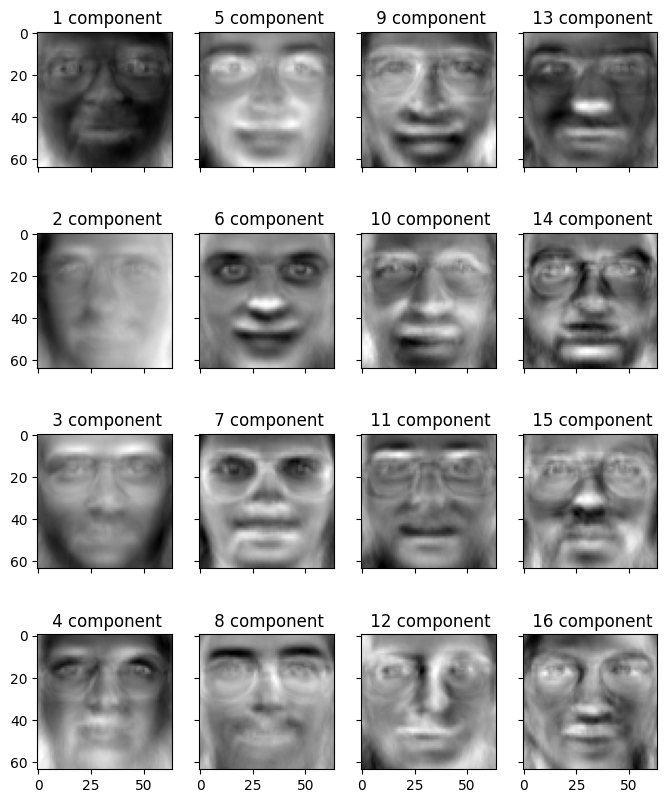

In [69]:
# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
faceshape=(64,64)

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    axes[i%4][i//4].set_title("% 1d component"%(i+1))
    
plt.show()

We observe that the eigenface that primarily explains our data is the first component, which accounts for approximately 22% of the cumulative variance (as indicated by the explained variance chart). This component eliminates non-important facial features and retains only the eyes, nose, and mouth from the images.

# Conclusions

Throughout this notebook, we use the terms "principal component" and "eigenfaces" interchangeably because, fundamentally, eigenfaces refer to the principal components obtained through principal component analysis on an image dataset. The eigenfaces/principal components enable us to condense the most valuable information of a dataset into fewer features. This method can be employed as a data visualization strategy, a data dimension reduction technique, or even as a feature engineering phase in a machine learning project.